Exploring Dandiset 001363: Neural Spiking Data in the Rat Somatosensory Cortex

⚠️ This notebook was AI-generated using dandi-notebook-gen and has not been fully verified. Use caution when interpreting the code or results.

## Overview of the Dandiset

This notebook explores the neural spiking data in the rat somatosensory cortex acquired using a flexible electrode in response to transcranial focused ultrasound. The dataset contains recordings from multiple sessions and animals, with varying levels of ultrasound pressure and duty cycles.

You can find more information about this Dandiset on the DANDI Archive:

[https://dandiarchive.org/dandiset/001363](https://dandiarchive.org/dandiset/001363)

And visualize the data with neurosift:

[https://neurosift.app/dandiset/001363](https://neurosift.app/dandiset/001363)

## What this notebook will cover

This notebook will guide you through the process of loading and visualizing data from the Dandiset. We will cover:

1.  Connecting to the DANDI archive and listing the available assets.
2.  Loading an NWB file and exploring its metadata.
3.  Loading and visualizing electrophysiology data.
4.  Exploring trial-related information.

## Required Packages

The following packages are required to run this notebook:

*   `pynwb`
*   `h5py`
*   `remfile`
*   `numpy`
*   `matplotlib`
*   `seaborn`
*   `pandas`

In [1]:
# Connect to the DANDI archive
from dandi.dandiapi import DandiAPIClient

client = DandiAPIClient()
dandiset = client.get_dandiset("001363")
assets = list(dandiset.get_assets())

print(f"Found {len(assets)} assets in the dataset")
print("\\nFirst 5 assets:")
for asset in assets[:5]:
    print(f"- {asset.path}")

Found 55 assets in the dataset
\nFirst 5 assets:
- sub-BH643/sub-BH643_ecephys.nwb
- sub-BH643/sub-BH643_ses-20241220T182204_ecephys.nwb
- sub-BH643/sub-BH643_ses-20241220T174647_ecephys.nwb
- sub-BH643/sub-BH643_ses-20241220T195303_ecephys.nwb
- sub-BH643/sub-BH643_ses-20241220T180423_ecephys.nwb


## Loading an NWB file and exploring its metadata

We will now load one of the NWB files from the Dandiset and explore its metadata.

We will load the file: `sub-BH589/sub-BH589_ses-20240827T160457_ecephys.nwb`

In [2]:
import pynwb
import h5py
import remfile

# Load
url = "https://api.dandiarchive.org/api/assets/59d1acbb-5ad5-45f1-b211-c2e311801824/download/"
remote_file = remfile.File(url)
h5_file = h5py.File(remote_file)
io = pynwb.NWBHDF5IO(file=h5_file, mode='r')
nwb = io.read()

# Display some metadata
print(f"Session description: {nwb.session_description}")
print(f"Identifier: {nwb.identifier}")
print(f"Session start time: {nwb.session_start_time}")
print(f"Institution: {nwb.institution}")
print(f"Subject ID: {nwb.subject.subject_id}")

Session description: Rat Ultrasound Array Stimulation
Identifier: BH589_1500_200_67_25V
Session start time: 2024-08-27 16:04:57-04:00
Institution: Carnegie Mellon University
Subject ID: BH589


/opt/conda/lib/python3.11/site-packages/hdmf/spec/namespace.py:535: UserWarning: Ignoring cached namespace 'hdmf-common' version 1.5.0 because version 1.8.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."
/opt/conda/lib/python3.11/site-packages/hdmf/spec/namespace.py:535: UserWarning: Ignoring cached namespace 'core' version 2.6.0-alpha because version 2.7.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."
/opt/conda/lib/python3.11/site-packages/hdmf/spec/namespace.py:535: UserWarning: Ignoring cached namespace 'hdmf-experimental' version 0.1.0 because version 0.5.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."


## Loading and visualizing electrophysiology data

Now, let's load and visualize some electrophysiology data from the NWB file.

Shape of electrical series dataset: (31084544, 32)
Sampling rate: 24414.0625 Hz


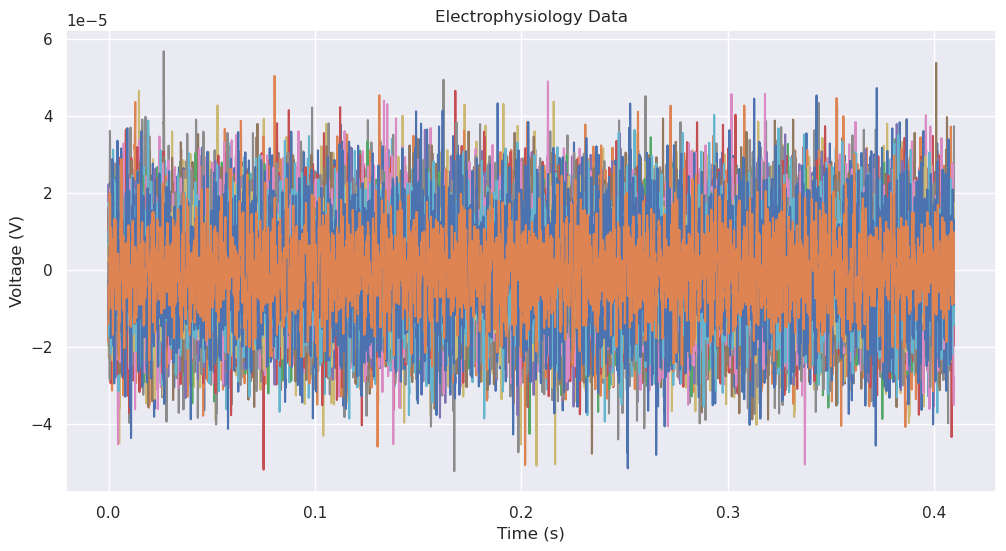

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()

# Load electrophysiology data
electrical_series = nwb.acquisition["ElectricalSeries"]
data = electrical_series.data
rate = electrical_series.rate
print(f"Shape of electrical series dataset: {data.shape}")
print(f"Sampling rate: {rate} Hz")

# Select a subset of channels and timepoints for visualization
num_channels = 32
num_timepoints = 10000

# Load a subset of data
data_subset = data[:num_timepoints, :num_channels]

# Create a time vector
time = np.arange(0, num_timepoints / rate, 1 / rate)

# Plot the data
plt.figure(figsize=(12, 6))
plt.plot(time, data_subset)
plt.xlabel("Time (s)")
plt.ylabel("Voltage (V)")
plt.title("Electrophysiology Data")
plt.show()

## Exploring trial-related information

Let's explore the trial-related information in the NWB file.

In [4]:
# Access the trials table
trials = nwb.intervals["trials"]

# Print the column names
print(f"Trial table column names: {trials.colnames}")

# Convert trials table to a dataframe
import pandas as pd
trials_df = trials.to_dataframe()

# Print the first 5 rows of the trials table
print(trials_df.head())

Trial table column names: ('start_time', 'stop_time')
    start_time  stop_time
id                       
1     0.341402   1.841402
2     2.816532   4.316532
3     5.115003   6.615003
4     7.458079   8.958079
5     9.984000  11.484000


## Summarizing findings and future directions

In this notebook, we have successfully loaded and visualized electrophysiology data from a DANDI Archive Dandiset. We have also explored the trial-related information in the NWB file.

Possible future directions for analysis:

*   Investigate the neural response to transcranial focused ultrasound stimulation (tFUS) on the somatosensory cortex.
*   Analyze the effect of varying duty cycle on the neural response.
*   Explore the effect of varying PRF on the neural response.